In [448]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
#imported all necessary libraries

In [449]:
data = pd.read_csv('training_set_features.csv')
target= pd.read_csv('training_set_labels.csv')
print(output.info())
print(data.info())
print(data.shape)
#importing training dataset and training target dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   xyz_vaccine       26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null 

In [450]:
data['xyz_vaccine']=target['xyz_vaccine']
data['seasonal_vaccine']=target['seasonal_vaccine']

#including target dataset with training dataset to maintain consistency during EDA

<Axes: >

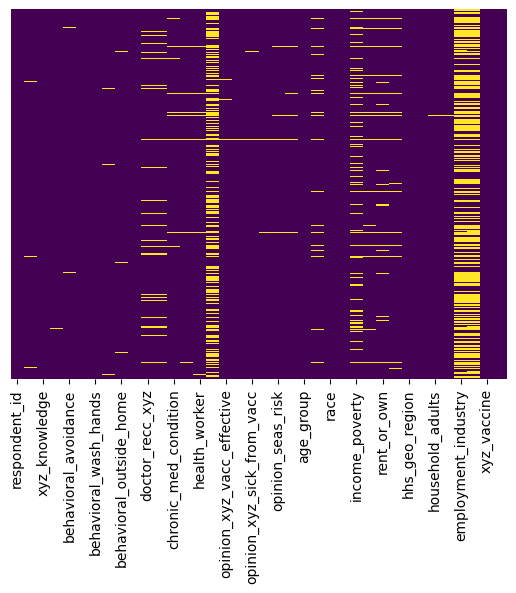

In [451]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [452]:
data

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [453]:
data['employment_industry'].fillna('Unemployed', inplace=True)
data['employment_occupation'].fillna('Unemployed', inplace=True)

#replaced NaN with unemployed in these two features beacuse they were NaN because they are unemloyed or not in labor

In [454]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [455]:
data['health_insurance'].value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

<Axes: xlabel='health_insurance', ylabel='count'>

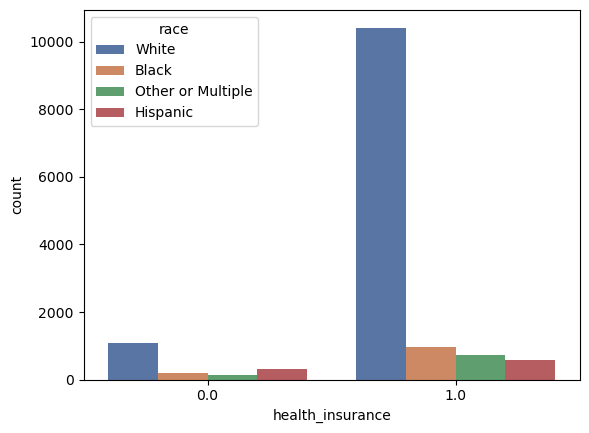

In [456]:
sns.countplot(x='health_insurance',hue='race',data=data,palette='deep')

In [457]:
data.loc[(data['race'] == 'White') & (data['income_poverty'] != 'Below Poverty') & (data['health_insurance'].isna()), 'health_insurance'] = 1.0
data.loc[(data['race'] == 'Hispanic') & (data['income_poverty'] == 'Below Poverty') & (data['health_insurance'].isna()), 'health_insurance'] = 0.0
data.info()
#after comparing health_insurance with other features, i observed that white who are not poor tends to have and insurance and poor hispanics are tend to not have an insurnace

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<Axes: xlabel='income_poverty', ylabel='count'>

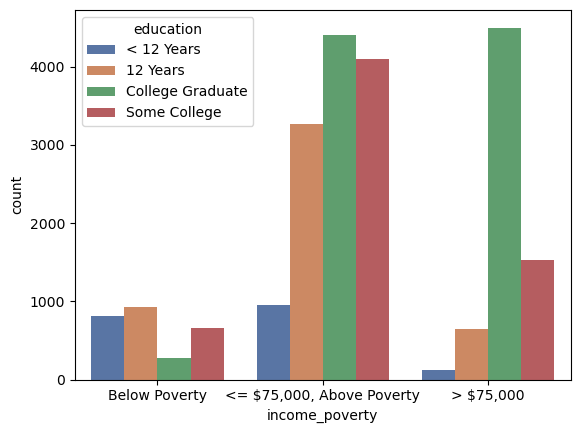

In [458]:
sns.countplot(x='income_poverty',hue='education',data=data,palette='deep')

In [459]:
def fill_na_with_mode(df):
    for column in df.columns:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    return df

data_clean = fill_na_with_mode(data)
#filled all the NaN values with mode in each feature
data_clean.shape

(26707, 38)

<Axes: >

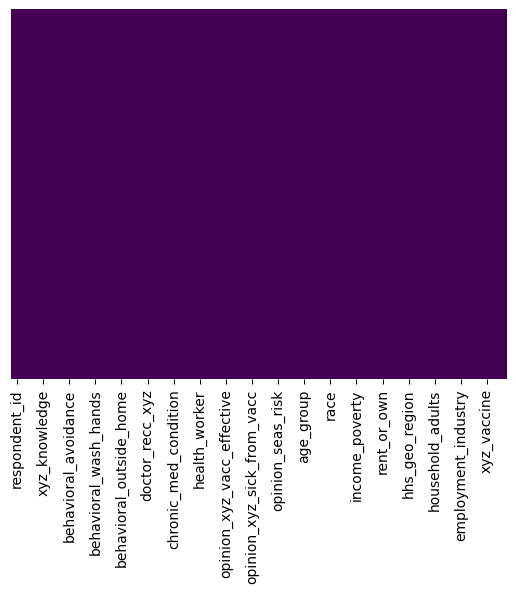

In [460]:
sns.heatmap(data_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [461]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [462]:
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry','employment_occupation']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

#applying one hot encoding on each categorical feature

In [463]:
X_train = data_clean.drop(['xyz_vaccine', 'seasonal_vaccine'], axis=1)
y_train = data_clean[['xyz_vaccine', 'seasonal_vaccine']]
print(y_train['seasonal_vaccine'].sum())

12435


In [464]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', OneVsRestClassifier(MultinomialNB()))])
#creating pipeline
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'hhs_geo_region',
                                                   'census_msa',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

In [465]:
test=pd.read_csv('test_set_features.csv')
test_target=pd.read_csv('submission_format.csv')
test['xyz_vaccine']=test_target['h1n1_vaccine']
test['seasonal_vaccine']=test_target['seasonal_vaccine']
test['employment_industry'].fillna('Unemployed', inplace=True)
test['employment_occupation'].fillna('Unemployed', inplace=True)
test.loc[(test['race'] == 'White') & (test['income_poverty'] != 'Below Poverty') & (test['health_insurance'].isna()), 'health_insurance'] = 1.0
test.loc[(test['race'] == 'Hispanic') & (test['income_poverty'] == 'Below Poverty') & (test['health_insurance'].isna()), 'health_insurance'] = 0.0
x_test = fill_na_with_mode(test)
#applying same preprocessing techniques on test dataset
X_test = x_test.drop(['xyz_vaccine', 'seasonal_vaccine'], axis=1)
y_test = x_test[['xyz_vaccine', 'seasonal_vaccine']]
X_test.shape

(26708, 36)

In [466]:
y_pred = model.predict(X_test)
print(y_pred.shape)
submission = pd.DataFrame({'respondent_id': X_test['respondent_id'],
                           'xyz_vaccine': y_pred[:, 0],
                           'seasonal_vaccine': y_pred[:, 1]})
submission.to_csv('submission.csv', index=False)

#saving desired output to csv file

(26708, 2)


In [467]:
#roc calculation

In [468]:
X = data_clean.drop(['xyz_vaccine', 'seasonal_vaccine'], axis=1)
y = data_clean[['xyz_vaccine', 'seasonal_vaccine']]
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X, y, test_size=0.30, random_state=42)
#spliting train dataset for roc calculation

In [469]:
y_pred_roc = model.predict_proba(X_test_roc)
roc_auc_xyz = roc_auc_score(y_test_roc['xyz_vaccine'], y_pred_roc[:, 0])
roc_auc_seasonal = roc_auc_score(y_test_roc['seasonal_vaccine'], y_pred_roc[:, 1])
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2
print('ROC AUC Score (xyz_vaccine):', roc_auc_xyz)
print('ROC AUC Score (seasonal_vaccine):', roc_auc_seasonal)
print('Mean ROC AUC Score:', mean_roc_auc)

ROC AUC Score (xyz_vaccine): 0.6313279902275573
ROC AUC Score (seasonal_vaccine): 0.6974047525509298
Mean ROC AUC Score: 0.6643663713892436
